# News Mood

- #### Review of last 100 Tweets by top news outlets shows FOX tweets have considerably higher compound sentiment score than Others. (Results obtained utilizing Vader Sentiment Analyzer).

- #### CNN has the low compound sentiment score.

- #### Needs to analyze more to get specific details 

In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random as r 
import seaborn as sn
from math import trunc

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "c8iPOfqAcm1qys97q3RW0wKOM"
consumer_secret = "6sUoqS7FtJkIKTfdoWaZHEf5quOEeqAfrJLsSJMzJd2Aw1myoF"
access_token = "229598666-EnGXtgqnFXT8zjHrMTI7medln9PlPdT5thbQhjJh"
access_token_secret = "Bdr3ujJgJqgf6wksE2b8OQ7CxkFTCAi5KolqLZrc9giNH"

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User Accounts
target_user = ('@BBC', '@CBS', '@CNN', '@Fox', '@New York Times')
#target_user = ('@CNN')

In [5]:
# A list to hold tweet timestamps
tweet_times = []
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
time_list = []
my_index = []

# Loop through each user
for user in target_user:
    idx = 0
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(5):
        public_tweets = api.user_timeline(user)
        
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate array
            user_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            my_index.append(idx)
            idx +=1

# Adding all the tweets into an Array

news_data = pd.DataFrame({'Agency': user_list, 'Compound': compound_list,'Positive': positive_list,
                            'Neutral':neutral_list,'Negative':negative_list,
                         'My_index':my_index
                         })
news_data.set_index('My_index')

,Agency,Compound,Negative,Neutral,Positive
My_index,,,,,
0,@BBC,-0.4007,0.114,0.886,0.000
1,@BBC,-0.5106,0.148,0.852,0.000
2,@BBC,0.0000,0.000,1.000,0.000
3,@BBC,0.0000,0.000,1.000,0.000
4,@BBC,0.3327,0.000,0.894,0.106
5,@BBC,0.5562,0.000,0.805,0.195
6,@BBC,0.0000,0.000,1.000,0.000
7,@BBC,0.5399,0.000,0.812,0.188
8,@BBC,0.0000,0.000,1.000,0.000


In [6]:
news_data['Agency'].unique()

array(['@BBC', '@CBS', '@CNN', '@Fox', '@New York Times'], dtype=object)

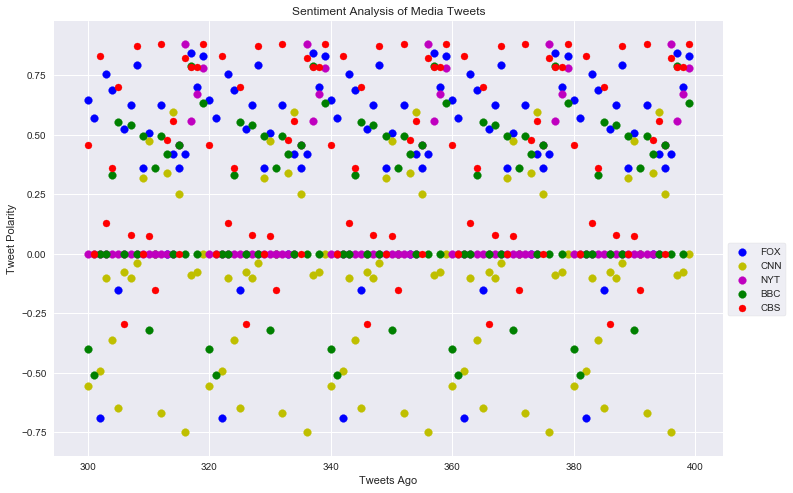

In [7]:
plt.figure(figsize=(12,8))
numbers = news_data[news_data['Agency'] == '@Fox'].index
plt.scatter(numbers, news_data[news_data['Agency']=='@Fox']['Compound'],  marker ='o', color='b', s=60, label = 'FOX')
plt.scatter(numbers,news_data[news_data['Agency']=='@CNN']['Compound'],  marker ='o', color='y', s=60, label = 'CNN')
plt.scatter(numbers, news_data[news_data['Agency']=='@New York Times']['Compound'], marker ='o', s=60, color='m', label = 'NYT')
plt.scatter(numbers,news_data[news_data['Agency']=='@BBC']['Compound'], marker ='o', s = 60, color='g', label = 'BBC')
plt.scatter(numbers,news_data[news_data['Agency']=='@CBS']['Compound'], marker ='o', color='r', label = 'CBS')
plt.gca().set(xlabel = 'Tweets Ago', ylabel = 'Tweet Polarity',title = 'Sentiment Analysis of Media Tweets')
plt.legend(loc = 'best',bbox_to_anchor=(1, 0.5), frameon=True)

plt.show()



In [8]:
Compound_percentage =  news_data.groupby('Agency').mean()['Compound'].to_frame("% Compound")
Compound_percentage

,% Compound
Agency,
@BBC,0.192695
@CBS,0.412080
@CNN,-0.099390
@Fox,0.442165
@New York Times,0.167490


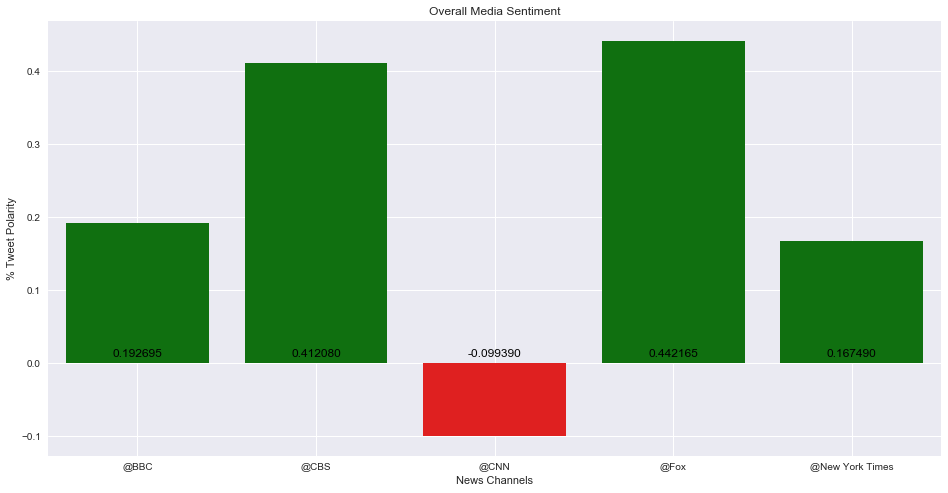

In [9]:
x=Compound_percentage.index
y=Compound_percentage['% Compound']
plt.figure(figsize=(16,8))
colors = ['green' if _y >=0.0 else 'red' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0.0:
        ax.annotate(
            s='{:f}'.format(_y), xy=(n, -0), ha='center',va='center',
            xytext=(0,10), color='k', textcoords='offset points')
    else:
        ax.annotate(
            s='{:f}'.format(_y), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='k', textcoords='offset points')  
plt.gca().set(xlabel='News Channels', ylabel='% Tweet Polarity', title='Overall Media Sentiment')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()